<a href="https://colab.research.google.com/github/Khinsuwaiphyo11/NLPLab_01/blob/main/23110171_%5BNLP%5D_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# [Assignment 1] Sentiment Analysis!
Try Sentiment Analysis by following suggenstions.
- Use Other dataset: [dataset list](https://research.aimultiple.com/sentiment-analysis-dataset/)
- Change your classifier: Other than `Logistic Regression`. [ref](https://www.kaggle.com/code/jeffd23/10-classifier-showdown-in-scikit-learn)
- Additional preprocessing: n-gram, stopwords [ref](https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0)

Will grade it only on and off. But briefly tell us what did you try.
-
-
-

#### Load the Dataset

[Assignment 1] Sentiment Analysis

In [ ]:
# Import libraries
import pandas as pd

# read the dataset
df = pd.read_csv('/content/mail_data.csv', sep=',')

# Replace null values with empty string
df.fillna('', inplace=True)

# Show top 5-records
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


#### Explore the dataset

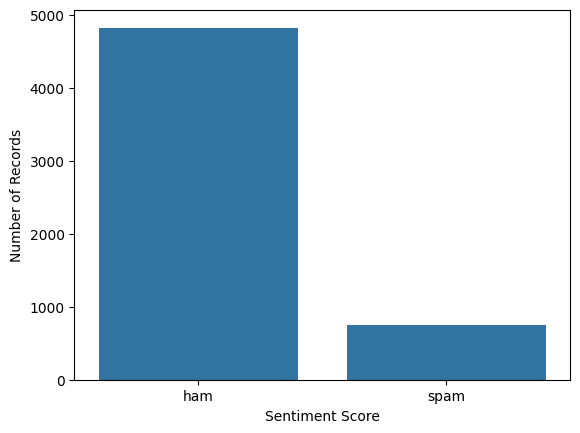

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='Category', data=df)

# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

# Show the plot using show() function
plt.show()


#### Feature Generation

In [ ]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer


# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize CountVectorizer object
count_vectorizer = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['Message'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Split train and test set

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df['Category'], test_size=0.3, random_state=1)

#### Classification Model Building using Any Machine Learning Model

In [ ]:
# import model from scikit-learn model
from sklearn.svm import SVC

# instantiate the model
model = SVC(kernel='linear', C=1.0)  # Adjust kernel and C parameter as needed

# fit the model with data
model.fit(feature_train, target_train)

# Forecast the target variable for given test dataset
predictions = model.predict(feature_test)

In [ ]:
print("Length of target_test:", len(target_test))
print("Length of predictions:", len(predictions))

Length of target_test: 1672
Length of predictions: 1672


#### Evaluate the Classification Model

In [ ]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assess model performance using accuracy measure
print("SVM Model Accuracy:", accuracy_score(target_test, predictions))

# Calculate model precision
print("SVM Model Precision:", precision_score(target_test, predictions, pos_label='spam'))

# Calculate model recall
print("SVM Model Recall:", recall_score(target_test, predictions, pos_label='spam'))

# Calculate model f1 score
print("SVM F1-Score:", f1_score(target_test, predictions, pos_label='spam'))

SVM Model Accuracy: 0.9760765550239234
SVM Model Precision: 0.9656862745098039
SVM Model Recall: 0.8565217391304348
SVM F1-Score: 0.9078341013824884
